In [113]:
# Import dependencies and modules
import csv
import os

import pandas as pd
import numpy as np
import gmaps
import matplotlib.pyplot as plt
import scipy.stats as stats

pd_firearm = pd.read_csv("ncis_firearm.csv")
pd_mass_shooting = pd.read_csv("mass_shooting.csv")


ModuleNotFoundError: No module named 'plotyly'

In [63]:
ncis_firearms = "ncis_firearm.csv"
ncis_firearms_df= pd.read_csv(ncis_firearms)

In [64]:
ncis_firearms_df.head()

,month,year,month.1,state,permit,permit_recheck,handgun,long_gun,other,multiple,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2019-06,2019,6,Alabama,28449.0,499.0,6947.0,4521.0,298.0,432,...,0.0,0.0,0.0,10.0,11.0,1.0,0.0,0.0,1.0,42898
1,2019-06,2019,6,Alaska,251.0,6.0,2465.0,2000.0,239.0,182,...,0.0,0.0,0.0,14.0,12.0,2.0,0.0,0.0,0.0,5557
2,2019-06,2019,6,Arizona,5371.0,438.0,11375.0,5931.0,1309.0,656,...,4.0,0.0,0.0,13.0,7.0,5.0,2.0,0.0,0.0,26746
3,2019-06,2019,6,Arkansas,2690.0,559.0,4653.0,3214.0,292.0,458,...,0.0,0.0,0.0,9.0,10.0,1.0,0.0,2.0,0.0,13956
4,2019-06,2019,6,California,39303.0,0.0,38712.0,27050.0,4856.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115987


In [65]:
ncis_permits = ncis_firearms_df.iloc[:,0: 7]


In [66]:
ncis_permits.head()

,month,year,month.1,state,permit,permit_recheck,handgun
0,2019-06,2019,6,Alabama,28449.0,499.0,6947.0
1,2019-06,2019,6,Alaska,251.0,6.0,2465.0
2,2019-06,2019,6,Arizona,5371.0,438.0,11375.0
3,2019-06,2019,6,Arkansas,2690.0,559.0,4653.0
4,2019-06,2019,6,California,39303.0,0.0,38712.0


In [67]:
# Michael Heat Maps USA
# Google developer API key
from config_key import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [68]:
mass_shootings_df = pd_mass_shooting
#mass_shootings_df = pd.read_csv(mass_shootings)
mass_shootings_df.head(2)

,case,location,date,month,summary,fatalities,injured,total_victims,location.1,age_of_shooter,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Virginia Beach municipal building shooting,"Virginia Beach, VA",5/31/2019,2019-05,"DeWayne Craddock, 40, a municipal city worker ...",12,4,16,Workplace,40,...,.45-caliber handguns,Black,M,https://www.washingtonpost.com/local/public-sa...,-,-,36.754420,-76.060378,Mass,2019
1,Harry Pratt Co. warehouse shooting,"Aurora, IL",2/15/2019,2019-02,"Gary Martin, 45, went on a rampage inside the ...",5,6,11,Workplace,45,...,"Smith & Wesson handgun, with a green sighting ...",Black,M,https://www.washingtonpost.com/nation/2019/02/...,-,-,41.753725,-88.331057,Mass,2019


In [69]:
mass_shootings_df["latitude"] = mass_shootings_df["latitude"].astype(float)
mass_shootings_df["longitude"] = mass_shootings_df["longitude"].astype(float)
locations = mass_shootings_df[["latitude", "longitude"]]

In [70]:
fig = gmaps.figure()

In [71]:
heat_layer = gmaps.heatmap_layer(locations, dissipating=False,  max_intensity=20,
                                 point_radius=1)
fig.add_layer(heat_layer)

plt.savefig("Heat Map")
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [72]:
# Michael Permit Graph
#ncis_firearms_df.head()

In [73]:
#ncis_permits = ncis_firearms_df.iloc[:,0: 7]

In [74]:
#ncis_permits.head()


In [75]:
# Cleaning and Merging data sets for graphs and t-test analysis
df_fa = pd_firearm.drop(pd_firearm.columns[5:29], axis=1)
df_fa.head()

,month,year,month.1,state,permit
0,2019-06,2019,6,Alabama,28449.0
1,2019-06,2019,6,Alaska,251.0
2,2019-06,2019,6,Arizona,5371.0
3,2019-06,2019,6,Arkansas,2690.0
4,2019-06,2019,6,California,39303.0


In [76]:
# Look at head of mass shooting data to see which columns to drop
#pd_mass_shooting.head()
# Drop columns not needed for analysis and for merge; naming df for mass shooting data df_ms
df_ms = pd_mass_shooting.drop(pd_mass_shooting.columns[[4,6,7,8,9,10,11,14,15,16,17,18,19,20,23]], axis=1)
df_ms.head()

,case,location,date,month,fatalities,weapons_obtained_legally,where_obtained,latitude,longitude,year
0,Virginia Beach municipal building shooting,"Virginia Beach, VA",5/31/2019,2019-05,12,Yes,-,36.754420,-76.060378,2019
1,Harry Pratt Co. warehouse shooting,"Aurora, IL",2/15/2019,2019-02,5,No,-,41.753725,-88.331057,2019
2,Pennsylvania hotel bar shooting,"State College, PA",1/24/2019,2019-01,3,Yes,-,40.785142,-77.839411,2019
3,SunTrust bank shooting,"Sebring, FL",1/23/2019,2019-01,5,Yes,-,27.471043,-81.458470,2019
4,Mercy Hospital shooting,"Chicago, IL",11/19/2018,2018-11,3,-,-,41.847667,-87.622009,2018


In [77]:
# Use groupby function (firearm data by month) to get unique variable and count data
#df_fa.groupby("month")["state","permit"].agg(["sum","count"])

grouped_df_fa = df_fa.groupby("month")["state","permit"].agg(["sum","count"])
grouped_df_fa.head()

state          permit  \
                                                       sum count       sum   
month                                                                        
1998-11  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55    2073.0   
1998-12  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   76096.0   
1999-01  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   77072.0   
1999-02  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   84759.0   
1999-03  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55  103185.0   

               
        count  
month          
1998-11    55  
1998-12    54  
1999-01    54  
1999-02    54  
1999-03    54

In [78]:
# Use groupby function (mass shooting data by month) to get unique variable and count data
#df_ms.groupby("month")["fatalities","weaponsobtained_legally","where_obtained","year"].agg(["sum","count"])

grouped_df_ms = df_ms.groupby("month")["fatalities","weapons_obtained_legally","where_obtained","year"].agg(["sum","count"])
grouped_df_ms.head()

fatalities       weapons_obtained_legally        \
               sum count                      sum count   
month                                                     
1999-04         13     1                       No     1   
1999-07          9     1                      Yes     1   
1999-09          8     1                      Yes     1   
1999-11          7     1                      Yes     1   
1999-12          5     1                      Yes     1   

                                            where_obtained        year        
                                                       sum count   sum count  
month                                                                         
1999-04  Purchased variously at Tanner Gun Show in Denv...     1  1999     1  
1999-07  Glock purchased from gun store in Warner Robin...     1  1999     1  
1999-09  Trader's Village flea market in Grand Prairie,...     1  1999     1  
1999-11  Hunting Supplies of Hawaii (The Armory) in Hon...     1  1999     1  
1999-12          One purchased from Big E's in Tampa, Fla.     1  1999     1

In [79]:
# Merge two grouped dataset df_fa and df_ms
ms_fs_grouped_data = pd.merge(grouped_df_fa, grouped_df_ms, how="left", on=["month"])
ms_fs_grouped_data.head()


state          permit  \
                                                       sum count       sum   
month                                                                        
1998-11  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55    2073.0   
1998-12  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   76096.0   
1999-01  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   77072.0   
1999-02  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   84759.0   
1999-03  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55  103185.0   

              fatalities       weapons_obtained_legally       where_obtained  \
        count        sum count                      sum count            sum   
month                                                                          
1998-11    55        NaN   NaN                      NaN   NaN            NaN   
1998-12    54        NaN   NaN                      NaN   NaN            NaN   
1999-01    54        NaN   NaN                      NaN   NaN            NaN   
1999-02    54        NaN   NaN                      NaN   NaN            NaN   
1999-03    54        NaN   NaN                      NaN   NaN            NaN   

              year        
        count  sum count  
month                     
1998-11   NaN  NaN   NaN  
1998-12   NaN  NaN   NaN  
1999-01   NaN  NaN   NaN  
1999-02   NaN  NaN   NaN  
1999-03   NaN  NaN   NaN

In [80]:
# Replacing NaN to 0 in df
#df['column'] = df['column'].replace(np.nan, 0)
ms_fs_grouped_data['fatalities','sum']=ms_fs_grouped_data['fatalities','sum'].replace(np.nan, 0)
ms_fs_grouped_data['fatalities','count']=ms_fs_grouped_data['fatalities','count'].replace(np.nan, 0)
ms_fs_grouped_data['year','sum']=ms_fs_grouped_data['year','sum'].replace(np.nan, 0)
ms_fs_grouped_data['year','count']=ms_fs_grouped_data['year','count'].replace(np.nan, 0)
ms_fs_grouped_data.head()

state          permit  \
                                                       sum count       sum   
month                                                                        
1998-11  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55    2073.0   
1998-12  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   76096.0   
1999-01  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   77072.0   
1999-02  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   84759.0   
1999-03  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55  103185.0   

              fatalities       weapons_obtained_legally       where_obtained  \
        count        sum count                      sum count            sum   
month                                                                          
1998-11    55        0.0   0.0                      NaN   NaN            NaN   
1998-12    54        0.0   0.0                      NaN   NaN            NaN   
1999-01    54        0.0   0.0                      NaN   NaN            NaN   
1999-02    54        0.0   0.0                      NaN   NaN            NaN   
1999-03    54        0.0   0.0                      NaN   NaN            NaN   

              year        
        count  sum count  
month                     
1998-11   NaN  0.0   0.0  
1998-12   NaN  0.0   0.0  
1999-01   NaN  0.0   0.0  
1999-02   NaN  0.0   0.0  
1999-03   NaN  0.0   0.0

In [81]:
ms_fs_grouped_data.dtypes

state                     sum       object
                          count      int64
permit                    sum      float64
                          count      int64
fatalities                sum      float64
                          count    float64
weapons_obtained_legally  sum       object
                          count    float64
where_obtained            sum       object
                          count    float64
year                      sum      float64
                          count    float64
dtype: object

In [82]:
# Richard trend line graphs
df=ms_fs_grouped_data.reset_index()
df.sort_values(by=[('permit','sum')],ascending=False)

month                                              state        \
                                                            sum count   
184  2014-03  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
208  2016-03  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
206  2016-01  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
207  2016-02  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
205  2015-12  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
232  2018-03  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
209  2016-04  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
211  2016-06  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
212  2016-07  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
220  2017-03  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
233  2018-04  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
210  2016-05  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
230  2018-01  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
218  2017-01  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
231  2018-02  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
234  2018-05  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
244  2019-03  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
215  2016-10  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
237  2018-08  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
229  2017-12  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
217  2016-12  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
221  2017-04  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
219  2017-02  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
222  2017-05  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
235  2018-06  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
228  2017-11  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
242  2019-01  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
245  2019-04  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
236  2018-07  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
196  2015-03  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
..       ...                                                ...   ...   
31   2001-06  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
30   2001-05  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
17   2000-04  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
22   2000-09  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
19   2000-06  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
24   2000-11  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
14   2000-01  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
80   2005-07  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
15   2000-02  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
60   2003-11  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
18   2000-05  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
78   2005-05  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
66   2004-05  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
13   1999-12  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
43   2002-06  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
68   2004-07  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
20   2000-07  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
12   1999-11  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
11   1999-10  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
5    1999-04  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
25   2000-12  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   
10   1999-09  AlabamaAlaskaArizonaArkansasCaliforniaColorado...  

In [83]:
shooting_events = df[('fatalities', 'sum')] > 0

In [84]:
shooting_matrix = pd.DataFrame(df[shooting_events].month)
shooting_matrix['y'] = 1000000
shooting_matrix['fatal']=df[('fatalities', 'sum')]
shooting_matrix.head()

,month,y,fatal
5,1999-04,1000000,13.0
8,1999-07,1000000,9.0
10,1999-09,1000000,8.0
12,1999-11,1000000,7.0
13,1999-12,1000000,5.0


In [85]:
type(shooting_matrix)

pandas.core.frame.DataFrame

In [86]:
# shooting_matrix = shooting_matrix.copy()
# shooting_matrix['y'] = 600000
# shooting_matrix.head()

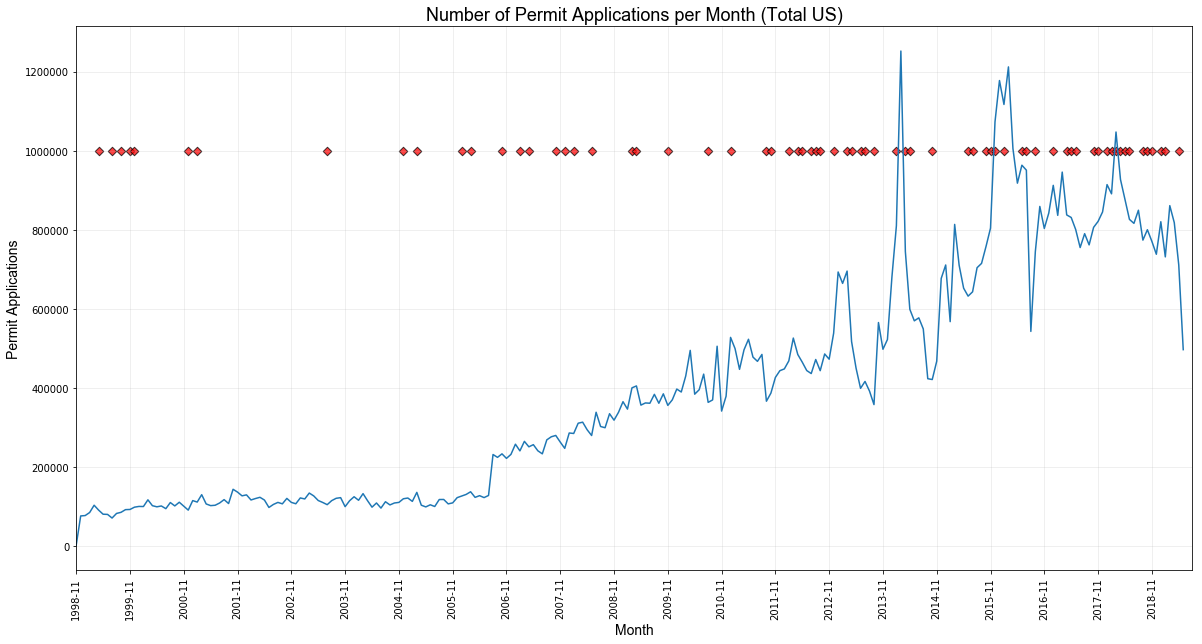

In [87]:
permit=df.loc[:,[("permit", "sum")]]
x_axis=df.loc[:,'month']
permit
plt.figure(figsize=(20,10))
plt.plot(x_axis, permit)
plt.scatter(shooting_matrix['month'],shooting_matrix['y'], marker="D", color="red", edgecolors="black", alpha=0.75)
plt.title("Number of Permit Applications per Month (Total US)", fontname="Arial", fontsize=18)
plt.ylabel("Permit Applications", fontname="Arial", fontsize=14)
plt.xlabel("Month",fontname="Arial",fontsize=14)
frequency=12
plt.xticks(x_axis[::frequency], rotation="vertical")
plt.xlim(0,249)
plt.grid(alpha=0.25)
plt.savefig("PermitAppsUS.png")


In [88]:
y = permit[('permit', 'sum')].tolist()
y2=df.loc[:,[("fatalities", "sum")]]

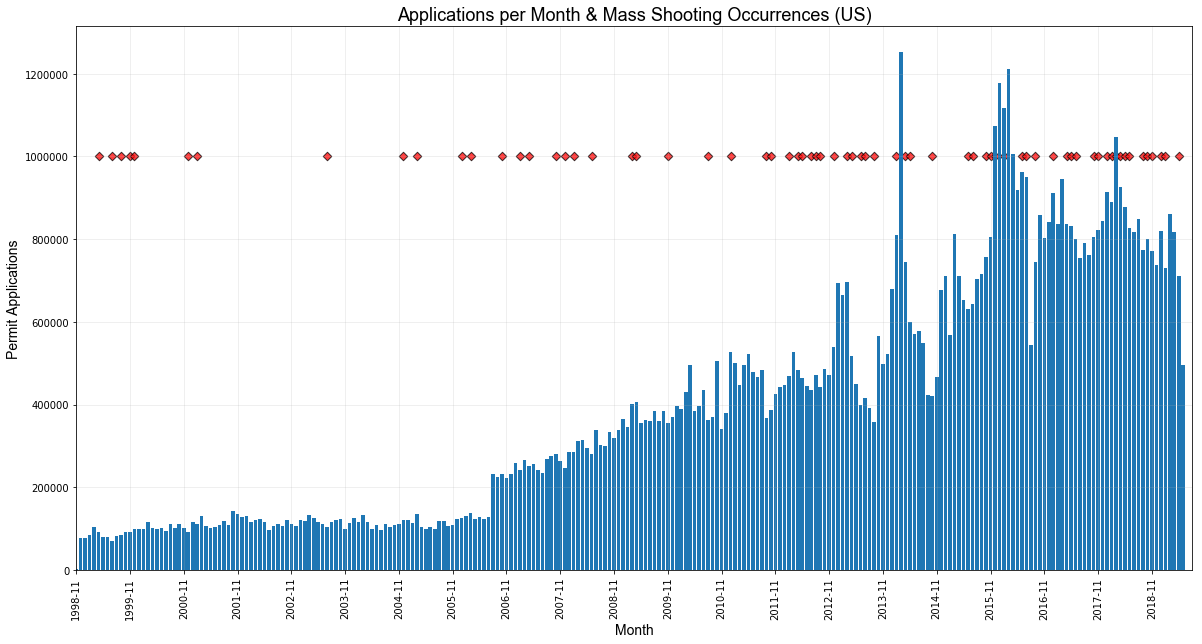

In [89]:
plt.figure(figsize=(20,10))
plt.bar(x_axis, y,align="center")
plt.scatter(shooting_matrix['month'],shooting_matrix['y'], marker="D", color="red", edgecolors="black", alpha=0.75)
plt.title("Applications per Month & Mass Shooting Occurrences (US)", fontname="Arial", fontsize=18)
plt.ylabel("Permit Applications", fontname="Arial", fontsize=14)
plt.xlabel("Month", fontname="Arial", fontsize=14)
frequency=12
plt.xticks(x_axis[::frequency], rotation="vertical")
plt.xlim(0,249)
plt.grid(alpha=0.25)
plt.savefig("PermitAppMassShootings.png")

In [90]:
# Misael Animated Permit Graph
ncis_permits = ncis_firearms_df.iloc[:,0: 5]
ncis_permits.sort_values(by=('month'), ascending=True)

#ncis_permits['permit']=ncis_permits['permit'].replace(np.nan, 0)
ncis_permits.head()

,month,year,month.1,state,permit
0,2019-06,2019,6,Alabama,28449.0
1,2019-06,2019,6,Alaska,251.0
2,2019-06,2019,6,Arizona,5371.0
3,2019-06,2019,6,Arkansas,2690.0
4,2019-06,2019,6,California,39303.0


In [112]:
# Misael graphs and hypothesis testing
pip install plotly_express
#pip install plotly_express

SyntaxError: invalid syntax (<ipython-input-112-f9156f03f768>, line 2)

In [92]:
ncis_permits.sort_values(by=('month'), ascending=True)
ncis_permits.head()
#ms_fs_grouped_data.iloc[:,0: 7]
#ms_fs_grouped_data.head()

,month,year,month.1,state,permit
0,2019-06,2019,6,Alabama,28449.0
1,2019-06,2019,6,Alaska,251.0
2,2019-06,2019,6,Arizona,5371.0
3,2019-06,2019,6,Arkansas,2690.0
4,2019-06,2019,6,California,39303.0


In [93]:
# Create animated plot a la Hans Roslin mode... source https://mlwhiz.com/blog/2019/05/05/plotly_express/
import plotly_express as px

#ncis_permits = ncis_firearms_df.iloc[:,0: 7]

#Replacing NaN to 0 in df as some date may have NaN
#ncis_permits['permit']=ncis_permits['permit'].replace(np.nan, 0)
#ncis_permits.head()
permits_by_states=ncis_permits[['permit','month','state','year']]
ncis_permits = ncis_permits.reset_index(drop=True)

# Converting month from object to integer
#df_fa_s['month'].astype(int)

#df_fa_s
px.scatter(permits_by_states,x='month',y='permit')

# px.scatter(permits_by_states,x='month',y='permit',color='state')

# px.scatter(permits_by_states,x='month',y='permit',color='state')

#px.scatter(permits_by_states,x='month',y='permit',color='state',size='permit')

#px.scatter(permits_by_states,x='year',y='permit',color='state',size='permit',symbol='state',animation_frame='year', animation_group='state',range_x=[0,25],range_y=[0,500000],text='state')

#df_fa_s.dtypes

In [94]:
plt.savefig("PermitAppsAnimated.png")

<Figure size 432x288 with 0 Axes>

In [104]:
# Create a dataframe for descriptive and hypothesis testing (t-test)
ms_fs_pops=ms_fs_grouped_data.iloc[:,0: 6]

ms_fs_pops.head(6)

state          permit  \
                                                       sum count       sum   
month                                                                        
1998-11  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55    2073.0   
1998-12  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   76096.0   
1999-01  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   77072.0   
1999-02  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   84759.0   
1999-03  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55  103185.0   
1999-04  AlabamaAlaskaArizonaArkansasCaliforniaColorado...    55   90873.0   

              fatalities        
        count        sum count  
month                           
1998-11    55        0.0   0.0  
1998-12    54        0.0   0.0  
1999-01    54        0.0   0.0  
1999-02    54        0.0   0.0  
1999-03    54        0.0   0.0  
1999-04    54       13.0   1.0

In [105]:
ms_fs_pops.describe()

state        permit              fatalities            
       count           sum       count         sum       count
count  248.0  2.480000e+02  248.000000  248.000000  248.000000
mean    55.0  3.913677e+05   54.903226    2.838710    0.342742
std      0.0  2.916132e+05    0.309613    6.910518    0.616464
min     55.0  2.073000e+03   53.000000    0.000000    0.000000
25%     55.0  1.167808e+05   55.000000    0.000000    0.000000
50%     55.0  3.509675e+05   55.000000    0.000000    0.000000
75%     55.0  5.680032e+05   55.000000    4.000000    1.000000
max     55.0  1.251905e+06   55.000000   61.000000    3.000000

In [108]:
# Create two subpopulatoins for t-test

ms_fs_no_ms = ms_fs_pops['fatalities','count']==0
#elderly = df['age'] > 50
ms_fs_no_ms

ms_fs_yes_ms = ms_fs_pops['fatalities','count']>0
#elderly = df['age'] > 50
ms_fs_yes_ms

month
1998-11    False
1998-12    False
1999-01    False
1999-02    False
1999-03    False
1999-04     True
1999-05    False
1999-06    False
1999-07     True
1999-08    False
1999-09     True
1999-10    False
1999-11     True
1999-12     True
2000-01    False
2000-02    False
2000-03    False
2000-04    False
2000-05    False
2000-06    False
2000-07    False
2000-08    False
2000-09    False
2000-10    False
2000-11    False
2000-12     True
2001-01    False
2001-02     True
2001-03    False
2001-04    False
           ...  
2017-01     True
2017-02    False
2017-03    False
2017-04     True
2017-05     True
2017-06     True
2017-07    False
2017-08    False
2017-09    False
2017-10     True
2017-11     True
2017-12    False
2018-01     True
2018-02     True
2018-03     True
2018-04     True
2018-05     True
2018-06     True
2018-07    False
2018-08    False
2018-09     True
2018-10     True
2018-11     True
2018-12    False
2019-01     True
2019-02     True
2019-03    False
2019-04 

In [109]:
# Generate random sample from each subpopulation
# Note: there are 85 months with incidents of one or more mass shootings. There are 165 months with no incidence of a mass shooting
# If project uses sample size of 51/85=.60 or 60% of cases; we can use that weighted percentage on other random subpop, 99/165=.60 
# Question for Huy... what does the random_state do to the random sample subpopulations. I get that the mean  
def gendata(loc1=0, loc2=0):
    ms_fs_no_ms = stats.norm.rvs(loc=loc1, size=99, random_state=0)
    ms_fs_yes_ms = stats.norm.rvs(loc=loc2, size=51, random_state=0)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(ms_fs_no_ms)), ms_fs_no_ms, label="ms_fs_no_ms")
    plt.scatter(range(len(ms_fs_yes_ms)), ms_fs_yes_ms, label="ms_fs_yes_ms")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(ms_fs_no_ms, 10, density=True, alpha=0.7, label="ms_fs_no_ms")
    plt.hist(ms_fs_yes_ms, 10, density=True, alpha=0.7, label="ms_fs_yes_ms")
    plt.axvline(ms_fs_no_ms.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(ms_fs_yes_ms.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return ms_fs_no_ms, ms_fs_yes_ms  

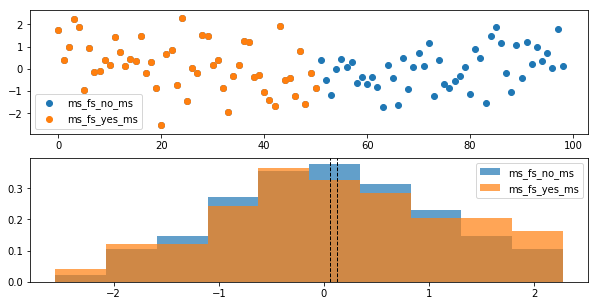

In [110]:
# Generate data and show the scatter plot
#ms_fs_no_ms, ms_fs_yes_ms = gendata()
plt.figure(figsize=(10,5))
plt.title("Scatter Plot/Histogram Subpopulations for T-test Comparison")
ms_fs_no_ms, ms_fs_yes_ms = gendata()
plt.savefig("Subpopulations for T-test.png")

In [111]:
# Note: Setting equal_var=False performs Welch's t-test; not assume equal population variance
stats.ttest_ind(ms_fs_no_ms, ms_fs_yes_ms, equal_var=False)

Ttest_indResult(statistic=-0.33811234384781486, pvalue=0.7360493347057374)